# Heart Disease Prediction Project by Vaishnavi Muley

In [1]:
import sklearn                                         #sklearn stands for Scikit-learn
import numpy as np                                     #Numpy stands for Numerical Python
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import os
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot


In [2]:
pyo.init_notebook_mode(connected=True)                 #Initiate notebook for offline plot

cf.go_offline()                                        #Update to use cufflinks offline


In [3]:
heart = pd.read_csv('heart.csv')                       #Simply reading the heart.csv file       

#Note: If your csv file is in the same folder where you launched the jupyter notebook then simply give its name in read_csv()
#else give the complete path of that file along with its name using 'r' keyword which is used for raw string.
#For eg: heart = pd.read_csv(r'C:\Users\Vaishnavi\Documents\Knowledge Solutions India\Final Project\Project_No_2\heart.csv')
#As in my case my heart.csv file is at "C:\Users\Vaishnavi\Documents\Knowledge Solutions India\Final Project\Project_No_2"


heart                                                 #This will simply print the content present in heart variable


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
        "resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)",
        " maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment",
        "number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]


#Note: For each column of heart.csv file we are specifying certain details/information like first column is age, in second column 1 is for male and 0 is for female,
# third column is of chest pain type in which 1 is for typical angina, 2 is for atypical angina, 3 is for non-anginal pain, 4 is for asymptomatic,
# fourth column is of resting blood pressure, fifth of serum cholestoral in mg/dl and so on and then storing this complete list in info variable.

for i in range(len(info)):
    print(heart.columns[i]+":\t\t\t"+info[i])

#Note: Here for each column of heart.csv file we have added the particular information from the info variable along with a ":" and 3 tabs
# and printed it.

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [5]:
heart['target']                                       #Selected the target column from the heart variable.


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
heart.groupby('target').size()                        #This function is displaying the total of unique elements 

#Here it is displaying the total numbers of 0 and 1 from the target column.

target
0    138
1    165
dtype: int64

In [7]:
heart.groupby('target').sum()                         #This function is giving the sum of all elements of a column based on target value

#Here we can see that based on target value all the columns like age, sex, cp,etc displayed their sum. 
#(i.e the total value of age for target 0 is 7811 and for 1 is 8662, total value of sex for target 0 is 114 and for 1 is 93 and so on.)  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,7811,114,66,18547,34650,22,62,19196,76,218.8,161,161,351
1,8662,93,227,21335,39968,23,98,26147,23,96.2,263,60,350


In [8]:
heart.shape                                            #This displays the total number of rows and columns

(303, 14)

In [9]:
heart.size                                             #This displays the product of total number of rows and columns (here 303 * 14)

4242

In [10]:
heart.describe()                                       #This gives the mathematical info of each column.

#like it is displaying total count, mean, standard deviation, minimum, distribution of data (25%, 50%, 75%) and max of all 14 columns.
#i.e it is describing every column in detail. 
#50 should be a value that describes the middle of the data, also known as median. 25, 75 is the border of the upper/lower quarter of the data.
#If we take example of age column the total count is 303, mean is 54.366337, std is 9.082101, min age is 29.000000, 25% age is 47.5, 75% is 61, etc 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
heart.info()                                             #This gives the info like column name, null or non-null types of values and the datatype of the element present in that particular value

#For eg: the total count of sex column is 303 without any null value and their data type is integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
heart['target'].unique()                                 #This displays the unique values present in a particular column

#Here it is displaying array of the unique values present in the target column in a list and also displaying its dataype.

array([1, 0], dtype=int64)

# Data Visualization  

# 1. Ploting histogram

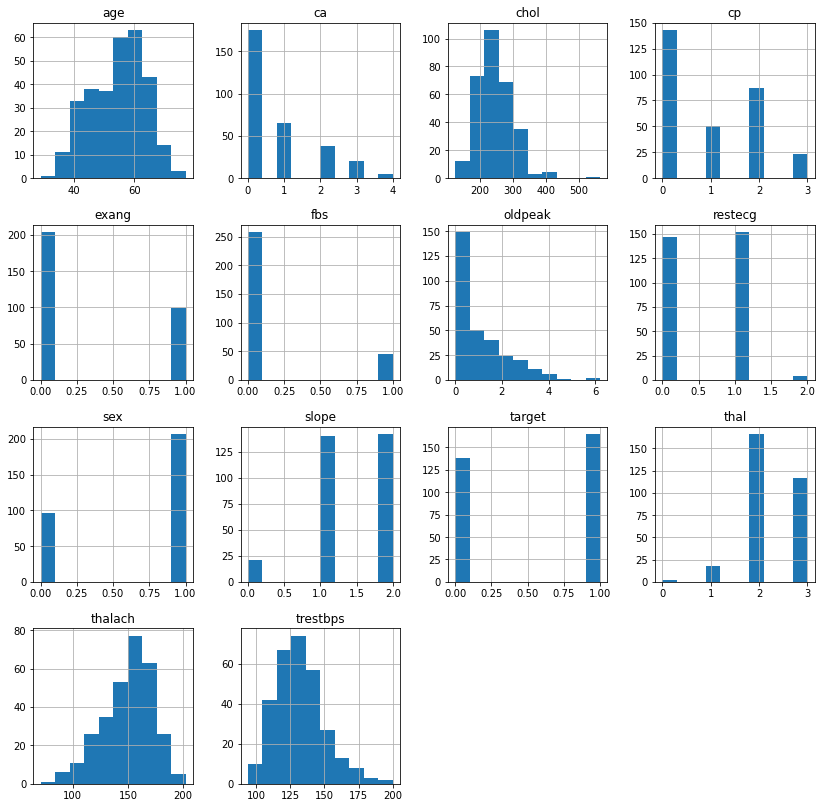

In [13]:


heart.hist(figsize=(14,14))                              #This will plot histogram for every column having numerical data                           
plt.show()

#figsize=(14,14) this is used to set the size of the figures (i.e length and height in pixels) 

# 2. Bar plot from matplotlib.pyplot module.

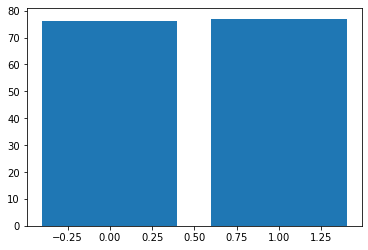

In [14]:

plt.bar(x=heart['sex'],height=heart['age'])                #This is plotting the bar graph in which sex is taken on x axis and age is taken as height

plt.show()


# 3. Bar plot from seaborn module.

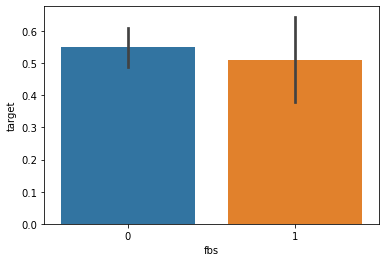

In [15]:

sns.barplot(x="fbs", y="target", data=heart)                  #This is again displaying the bar graph of fbs V/S target  
plt.show()


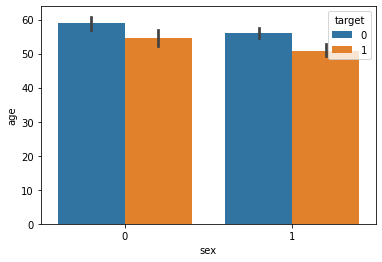

In [16]:
sns.barplot(x=heart['sex'],y=heart['age'],hue=heart['target'])
#hue parameter determines which column in the data frame should be used for colour encoding.
#Here we took target column for color encoding.
plt.show()

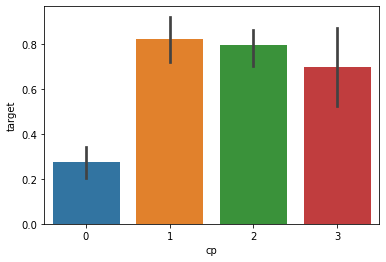

In [17]:
sns.barplot(heart["cp"],heart['target'])                #This is plotting the cp V/S target bar graph 
#From this we come to know that x,y,hue parameters are optional
plt.show()

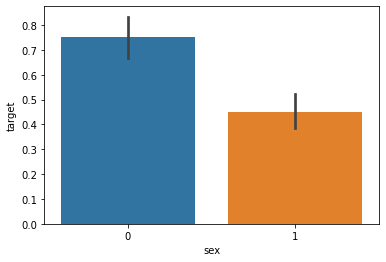

In [18]:
sns.barplot(heart["sex"],heart['target'])               #This is plotting the sex V/S target bar graph 
plt.show()

# 4. Interactive bar graph using plotly.express module

In [19]:


px.bar(heart,heart['sex'],heart['target']) 


# 5. Dist Plots using seaborn module

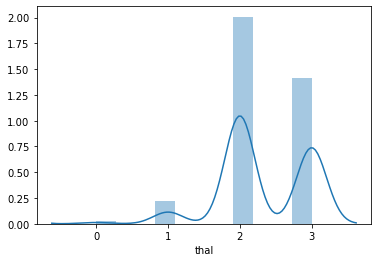

In [20]:


sns.distplot(heart["thal"])                              #This is plotting dist plot for thal
plt.show()


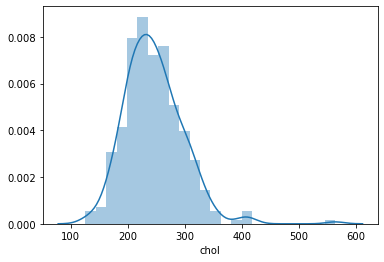

In [21]:
sns.distplot(heart["chol"])                              #This is plotting dist plot for cholestrol
plt.show()

In [22]:

#sns.pairplot(heart,hue='target')
#plt.show()

In [23]:
#heart
#numeric_columns=['trestbps','chol','thalach','age','oldpeak']
#sns.pairplot(heart[numeric_columns])
#plt.show()

# 6. Count Plots using seaborn module

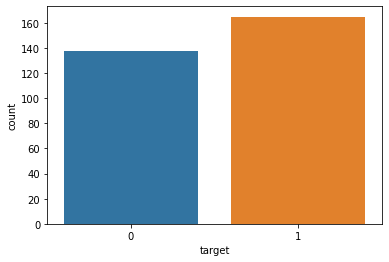

In [24]:

y = heart["target"]

sns.countplot(y)                                    #Plotting the count plot of target values


In [25]:
heart['target']                                     #Displaying the target column from heart data

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
target_temp = heart.target.value_counts()          #Getting the total number of each unique value present in the given column

#Here getting the total numbers of 0 and 1 present in the target column
print(target_temp)


1    165
0    138
Name: target, dtype: int64


# 7. Create a correlation heatmap

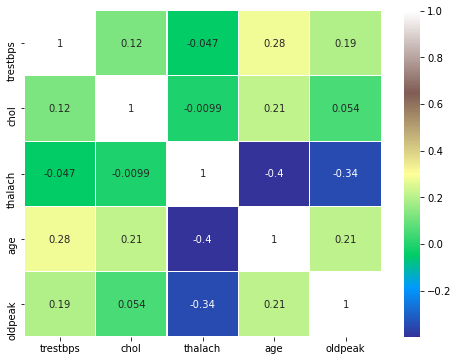

In [27]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']
sns.heatmap(heart[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)

#heastmap parameters we used: 
#annot: bool or rectangular dataset. (annot=True means write the data value in each cell.)
#cmap: matplotlib colormap name or object, or list of colors. (terrain is a color map)

fig=plt.gcf()                                       # gcf() allows us to get a reference to the current figure when using pyplot.
fig.set_size_inches(8,6)                            # We have set the size of the plot using set_size_inches()
plt.show()



# 8. Create four distplots 

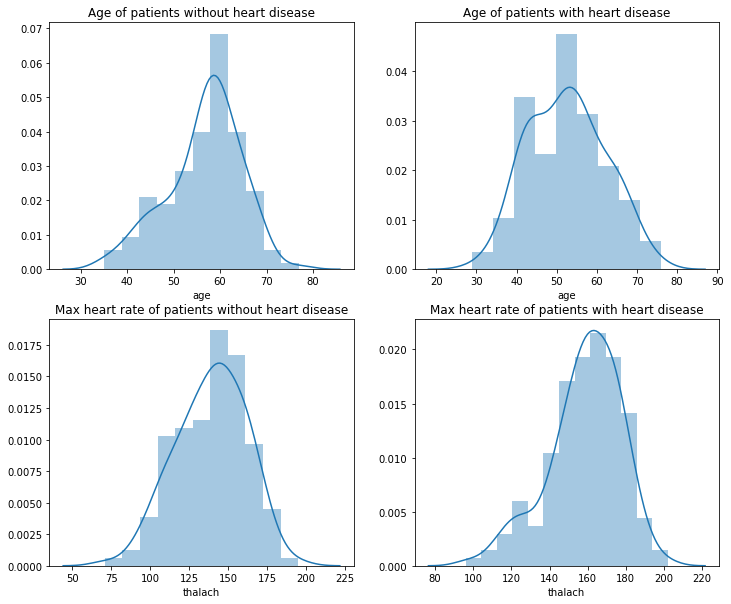

In [28]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['target']==0].age)                  #distplot based on age and target value 0
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['target']==1].age)                  #distplot based on age and target value 1
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['target']==0].thalach )             #distplot based on thalach and target value 0
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['target']==1].thalach )             #distplot based on thalach and target value 1
plt.title('Max heart rate of patients with heart disease')
plt.show()


# 9. Violinplot and swarmplot 

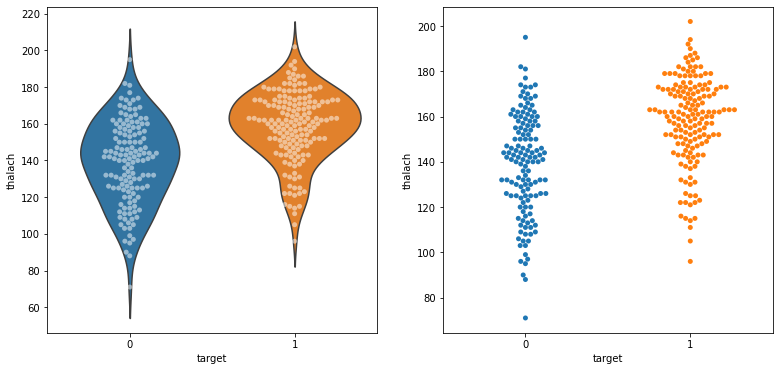

In [29]:
plt.figure(figsize=(13,6))
#subplot(m,n,p) or subplot(mnp), where m = no. of rows, n = no. of columns and p = where you want to place the plot
#here we would like to have one row and two columns worth of figures and p=1 means that we wish to place the plot in the left most column.    
plt.subplot(121)                               
sns.violinplot(x="target", y="thalach", data=heart, inner=None)


sns.swarmplot(x="target", y="thalach", data=heart, color='w', alpha=0.5)
plt.subplot(122)
sns.swarmplot(x="target", y="thalach", data=heart)
plt.show()


# 10. Create pointplot, barplot and countplot


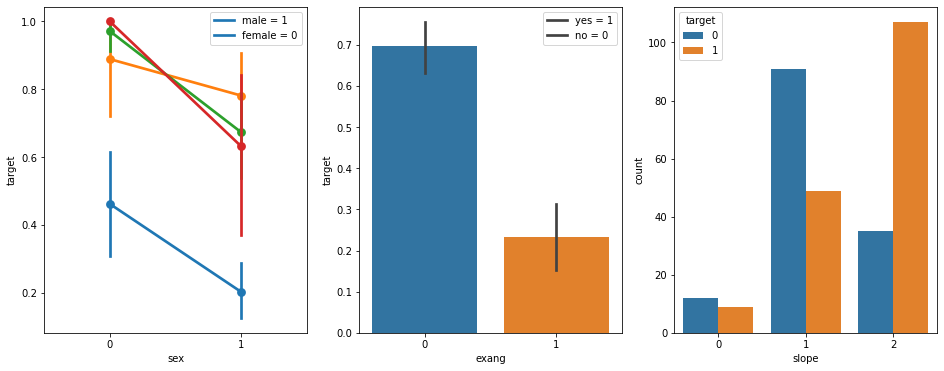

In [30]:
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="target", hue='cp', data=heart)

plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=heart)

plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=heart)
plt.show()


# DATA Preprocessing


In [31]:
heart['target'].value_counts()

#Getting the total count of unique values present in target column (i.e 0 and 1)

1    165
0    138
Name: target, dtype: int64

In [32]:
heart['target'].isnull()

#Checking if the target column have null values or not. Here false means no null value present

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: target, Length: 303, dtype: bool

In [33]:
heart['target'].sum()

#Getting the total of values present in target column


165

In [34]:
heart['target'].unique()

#unique() displays the unique values present in a particular column
#Here it is displaying array of the unique values present in the target column in a list and also displaying its dataype.

array([1, 0], dtype=int64)

In [35]:
heart.isnull().sum()

#Getting the sum of null values in each column

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Storing in x and y

In [36]:
x,y=heart.loc[:,:'thal'],heart.loc[:,'target']
#Or we can also use (x, y = heart.iloc[:, :-1], heart.iloc[:, -1]) for the same
# in loc[] we have to specify the column name and in iloc index of column

#Putting all the columns in x except target column, target column is stored in y
#This is the first step for model building

print(x) 


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [37]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [38]:
x.shape

#Getting the total number of rows and columns using shape

(303, 13)

In [39]:
y.shape

#Here we only have one column so the output is (303,) which means 303 rows and 1 column

(303,)

In [40]:
x=heart.drop(['target'],axis=1)
x

#Here we dropped the target column and stored the result in x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

#test_size = 0.3 means we have build the model on 70-30 % basis out of which our training part is 70% and testing part is 30%
#random_state = 10 means we have took random 10 rows of data which are fixed, i.e everytime we will run our code we will get those values only
#shuffle = True meand we took the shuffled rows i.e not in sequence

#Splitting the x and y into train and test parts for creating training and testing purpose
#This is the second step for creating models

In [42]:
x_test


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [43]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [44]:
print ("train_set_x shape: " + str(x_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(x_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

#Printing the number of rows and columns present in the train and test part of x and y using concatination operator

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


# Model



# Decision Tree Classifier

In [45]:
Catagory=['No....but i pray you will not get Heart Disease or at leaset Corona Virus Soon...','Yes you have Heart Disease....RIP in Advance']
 
#Setting the message based on whether a person does not have or have a heart disease

In [46]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

#Giving x_train and y_train to decidion tree classifier for classification

DecisionTreeClassifier()

In [47]:
prediction=dt.predict(x_test)     

#Predicting x_test

In [48]:
accuracy_dt=accuracy_score(y_test,prediction)*100

#Checking the accuracy by comparing the x_test prediciton result with y_test 
accuracy_dt


74.72527472527473

In [49]:
print("Accuracy on training set: {:.3f}".format(dt.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(x_test, y_test)))

#score(x_train,y_train) is measuring the accuracy of the model against the training data
#score(x_test,y_test) is measuring the accuracy of the model against the testing data

Accuracy on training set: 1.000
Accuracy on test set: 0.747


In [50]:
y_test


246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [51]:
prediction


array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [52]:
x_DT=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]]) #passed the array containing data for each column

x_DT_prediction=dt.predict(x_DT)                        #passing the above data for prediction 

print(x_DT_prediction)
print(x_DT_prediction[0])                               #here our predicted value is 1 which means person have heart disease                          



[1]
1


In [53]:
print(Catagory[int(x_DT_prediction[0])])                

#after passing the predicted value as an index to Category list  which we created above we got the message displayed

Yes you have Heart Disease....RIP in Advance


# Feature Importance in Decision Trees

In [54]:
print("Feature importances:\n{}".format(dt.feature_importances_))

#Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.


Feature importances:
[0.05662491 0.0283698  0.32392476 0.10822571 0.07033834 0.
 0.         0.08395293 0.04724994 0.05969847 0.09243231 0.10975468
 0.01942815]


In [55]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


#Created a function in which model is taken as parameter and figure size is set, features are set (the 13 columns)
#a barh() graph is plot using 13 as a range, and an array of feature_importance is passed and graph is aligned to center 

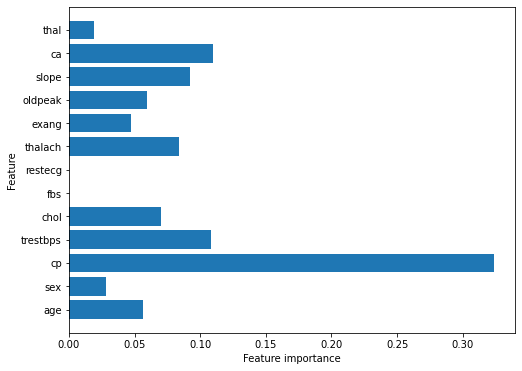

In [56]:
plot_feature_importances_diabetes(dt)



In [57]:
plt.savefig('feature_importance')


<Figure size 432x288 with 0 Axes>

#  KNN

In [58]:
#The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. 
#In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).

sc=StandardScaler().fit(x_train)
x_train_std=sc.transform(x_train)                          #transforming the train and test data of x
x_test_std=sc.transform(x_test)

x_test_std

array([[ 0.18111199, -1.35154233, -0.97043553, ..., -0.6067969 ,
         1.33369489,  1.22676132],
       [ 0.39865161,  0.73989544,  0.97963397, ..., -0.6067969 ,
         0.33105902,  1.22676132],
       [ 1.05127045,  0.73989544,  0.97963397, ..., -0.6067969 ,
        -0.67157686,  1.22676132],
       ...,
       [ 0.2898818 ,  0.73989544,  0.97963397, ..., -0.6067969 ,
         0.33105902,  1.22676132],
       [-0.25396724,  0.73989544,  0.00459922, ...,  0.98136289,
        -0.67157686, -0.41927286],
       [ 0.61619122,  0.73989544, -0.97043553, ..., -0.6067969 ,
         1.33369489,  1.22676132]])

In [59]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train_std,y_train)


KNeighborsClassifier(n_neighbors=4)

In [60]:
prediction_knn=knn.predict(x_test_std)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100


In [61]:
accuracy_knn

84.61538461538461

In [62]:
print("Accuracy on training set: {:.3f}".format(knn.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(x_test, y_test)))


Accuracy on training set: 0.373
Accuracy on test set: 0.516


In [63]:
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_std,y_train)
    prediction_knn=knn.predict(x_test_std)
    scores[k]=accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))



In [64]:
scores


{1: 0.7692307692307693,
 2: 0.8241758241758241,
 3: 0.8241758241758241,
 4: 0.8461538461538461,
 5: 0.8131868131868132,
 6: 0.8131868131868132,
 7: 0.8131868131868132,
 8: 0.8351648351648352,
 9: 0.7802197802197802,
 10: 0.7912087912087912,
 11: 0.7912087912087912,
 12: 0.7802197802197802,
 13: 0.7912087912087912,
 14: 0.8021978021978022,
 15: 0.7802197802197802,
 16: 0.7912087912087912,
 17: 0.7802197802197802,
 18: 0.7802197802197802,
 19: 0.7692307692307693,
 20: 0.7802197802197802,
 21: 0.7802197802197802,
 22: 0.7802197802197802,
 23: 0.7802197802197802,
 24: 0.7802197802197802,
 25: 0.7802197802197802}

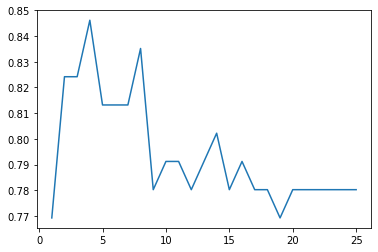

In [65]:
plt.plot(k_range,scores_list)



In [66]:
px.line(x=k_range,y=scores_list)

In [67]:
X_knn=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_knn_std=sc.transform(X_knn)


X_knn_std



array([[ 0.94250064,  0.73989544,  1.95466871,  0.75961822, -0.30064937,
         2.37170825, -0.9841849 ,  0.01848325, -0.6723502 ,  1.10653103,
        -2.1949567 , -0.67157686, -2.06530703]])

In [68]:
X_knn_prediction=dt.predict(X_knn)
(X_knn_prediction[0])

1

In [69]:
print(Catagory[int(X_knn_prediction[0])])

Yes you have Heart Disease....RIP in Advance


Text(0, 0.5, 'Accuracy score')

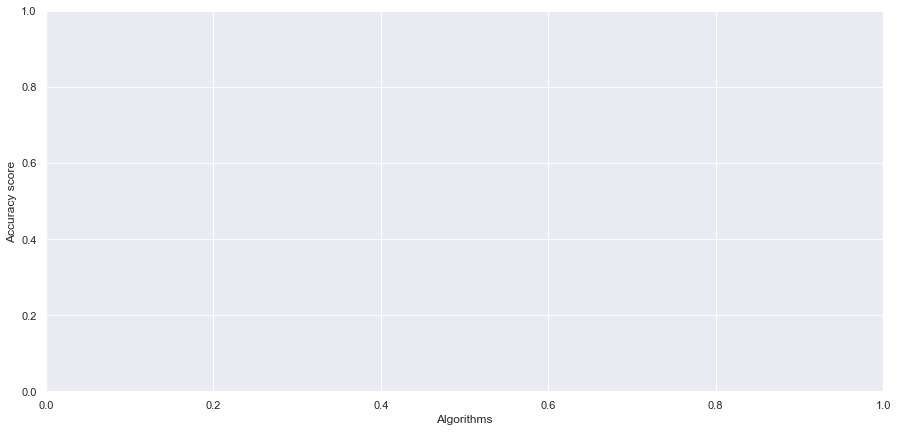

In [70]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn]

sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

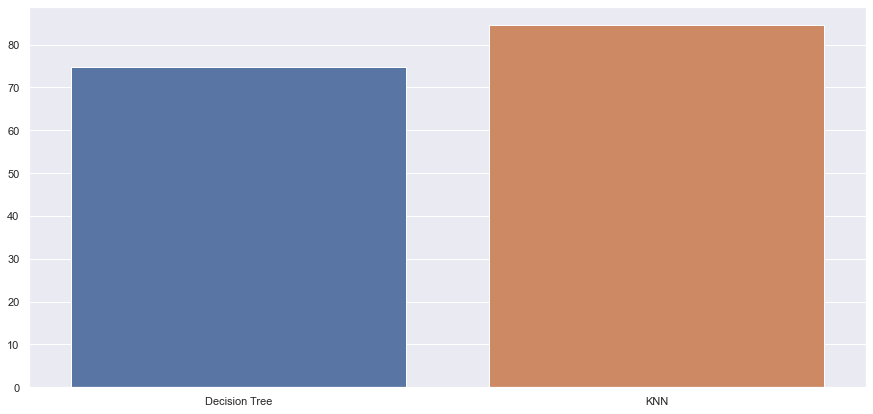

In [71]:
sns.barplot(algorithms,scores)

# Done with the project